In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Loading the data**

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   code_module                 32593 non-null  object 
 1   code_presentation           32593 non-null  object 
 2   gender                      32593 non-null  object 
 3   region                      32593 non-null  object 
 4   highest_education           32593 non-null  object 
 5   imd_band                    31482 non-null  object 
 6   age_band                    32593 non-null  object 
 7   num_of_prev_attempts        32593 non-null  int64  
 8   studied_credits             32593 non-null  int64  
 9   disability                  32593 non-null  object 
 10  final_result                32593 non-null  object 
 11  date_dataplus               2710 non-null   float64
 12  date_dualpane               3707 non-null   float64
 13  date_externalquiz

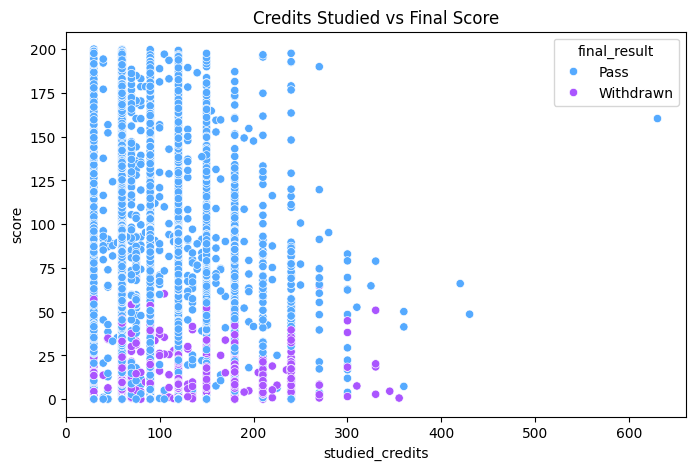


Duplicate Records: 5


In [ ]:
df = pd.read_csv('/content/final_dataset.csv')

print("Dataset Info:")
print(df.info())

print("\nSample Data:")
print(df.head())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nBasic Statistics:")
print(df.describe())


if 'score' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x='studied_credits', y='score', hue='final_result', palette='cool')
    plt.title('Credits Studied vs Final Score')
    plt.show()

print("\nDuplicate Records:", df.duplicated().sum())


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **Data Visualization**

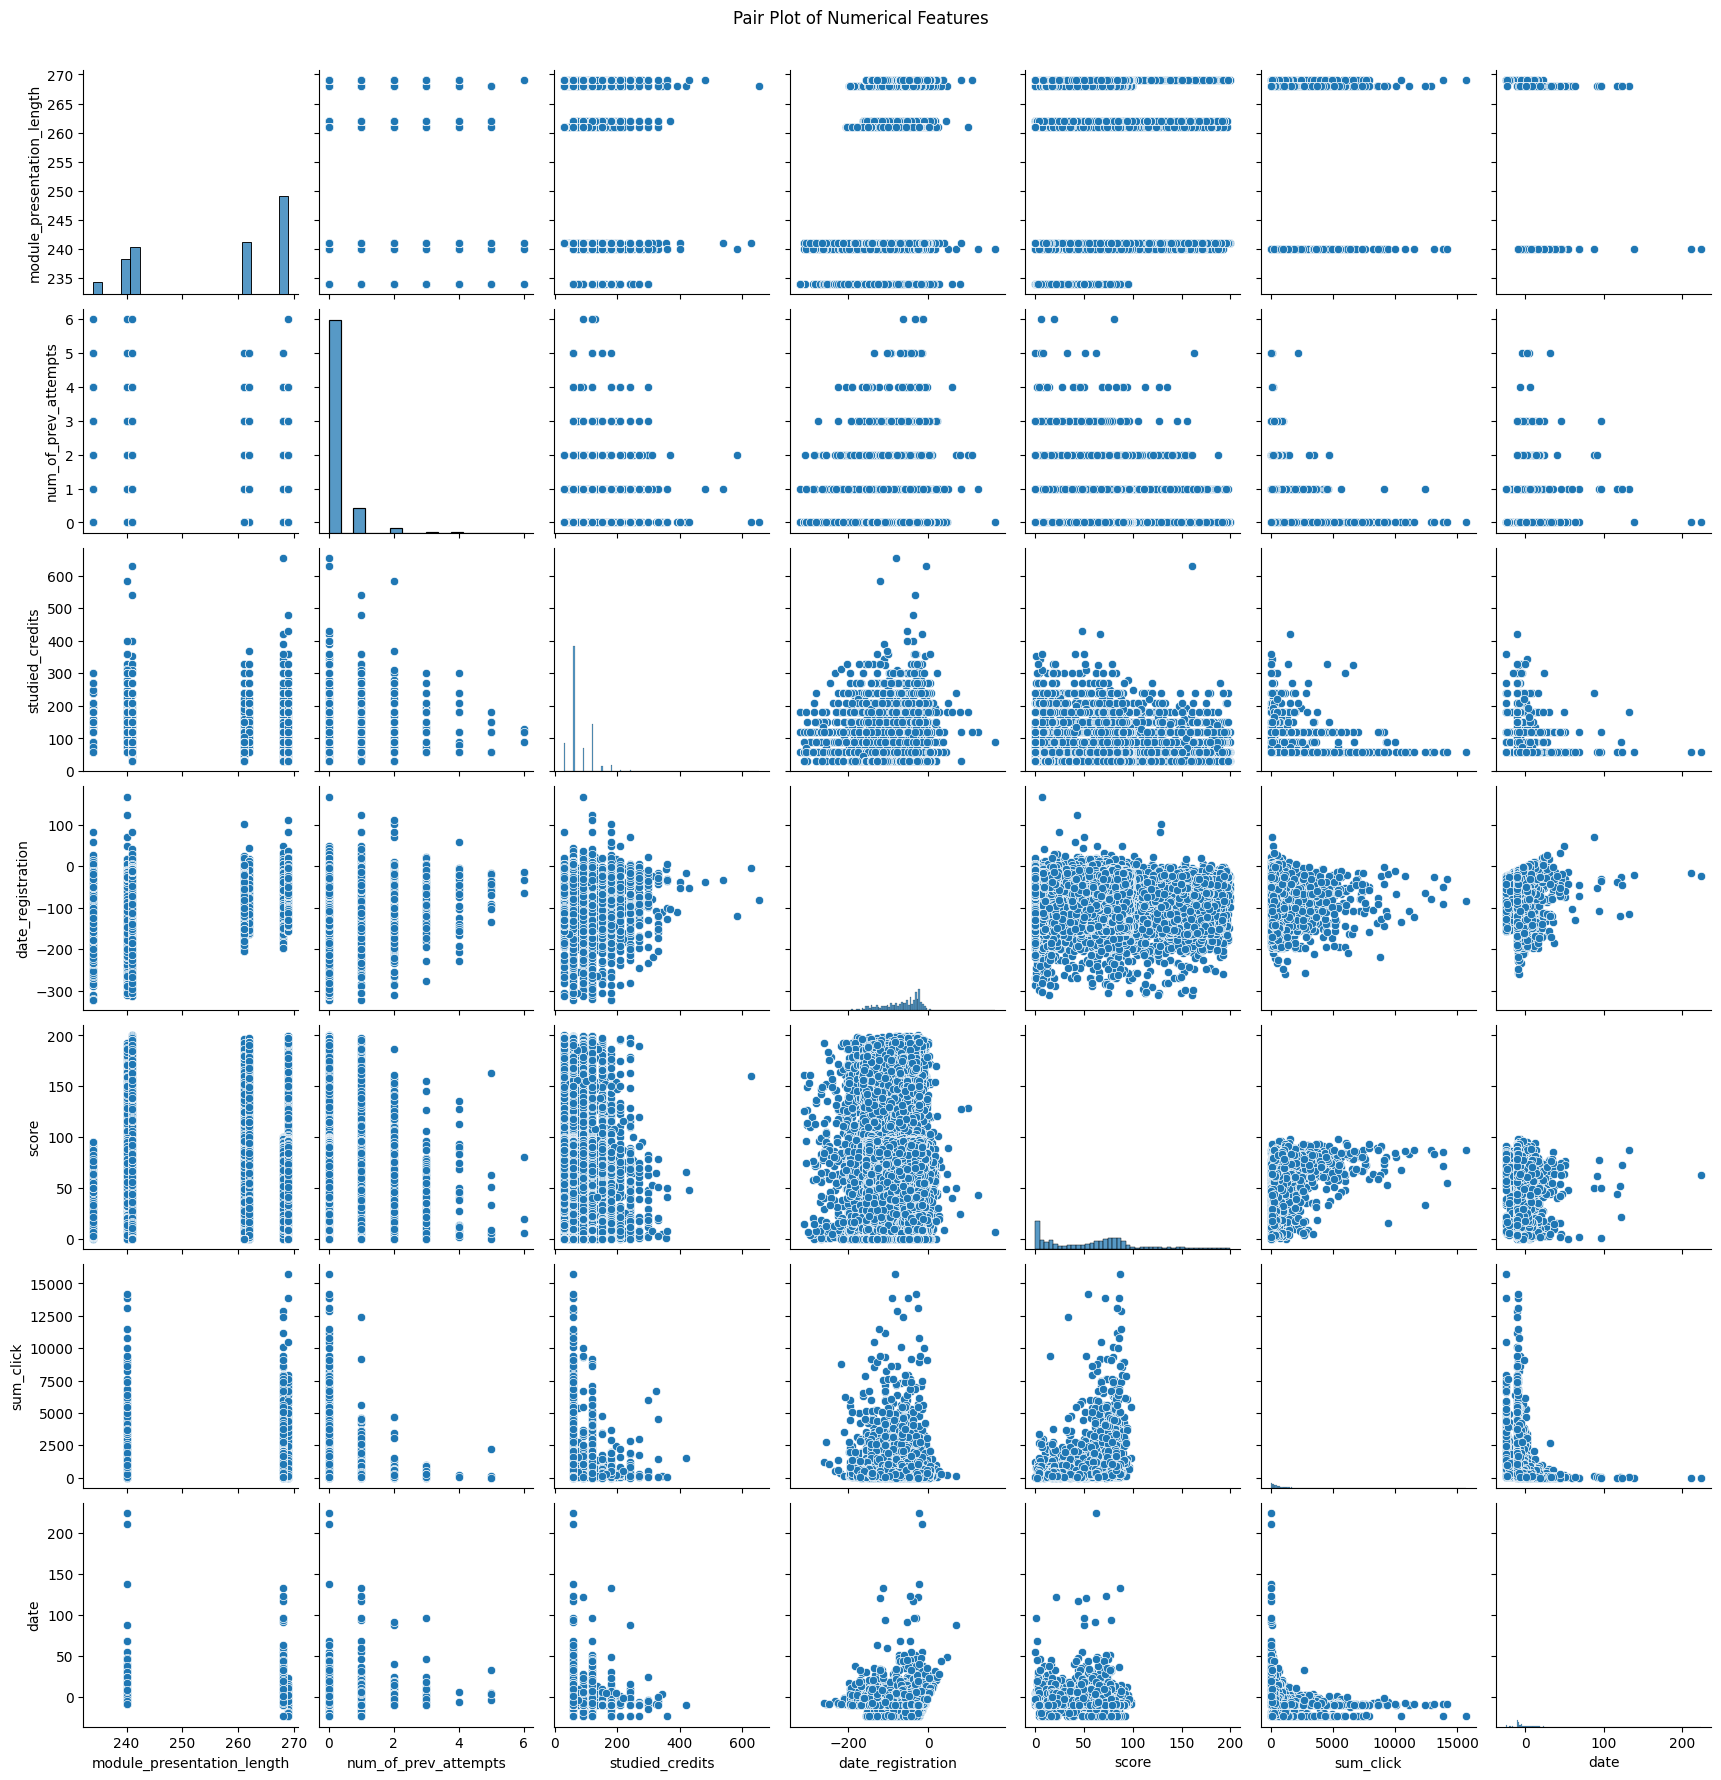

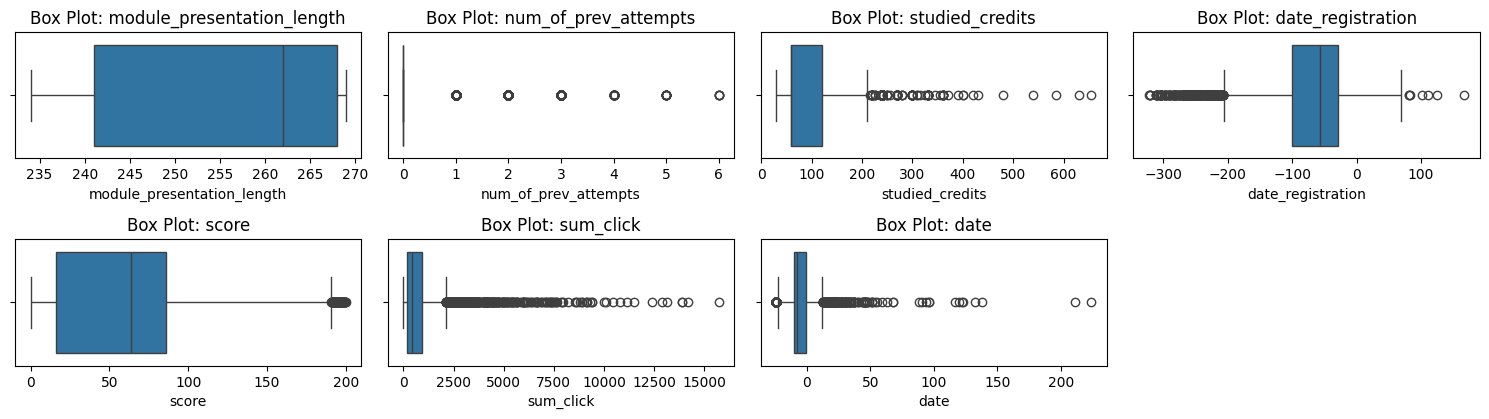

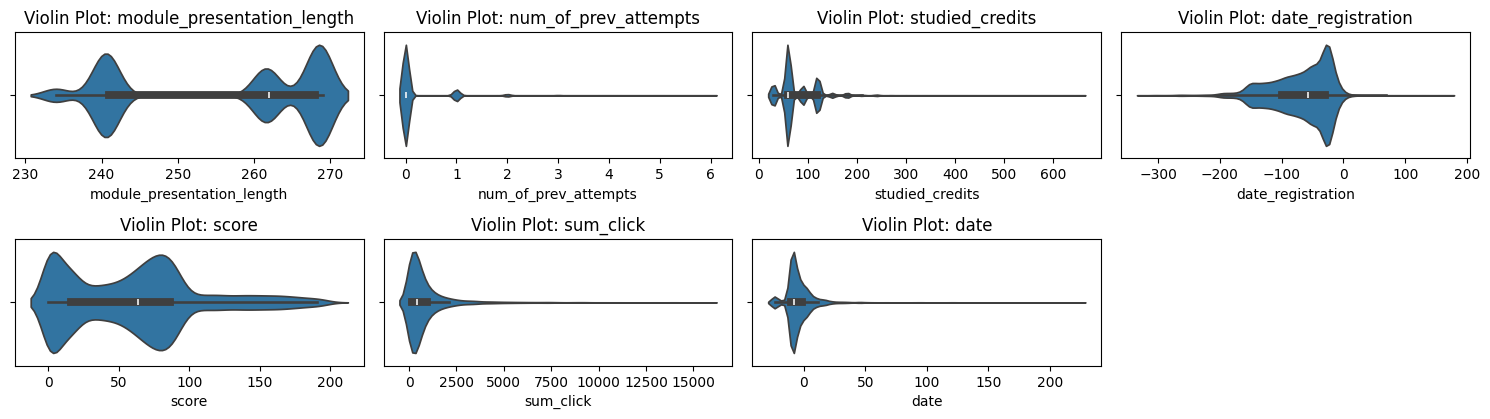

<ipython-input-3-d543e53a8fce>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')
<ipython-input-3-d543e53a8fce>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')
<ipython-input-3-d543e53a8fce>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')
<ipython-input-3-d543e53a8fce>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for th

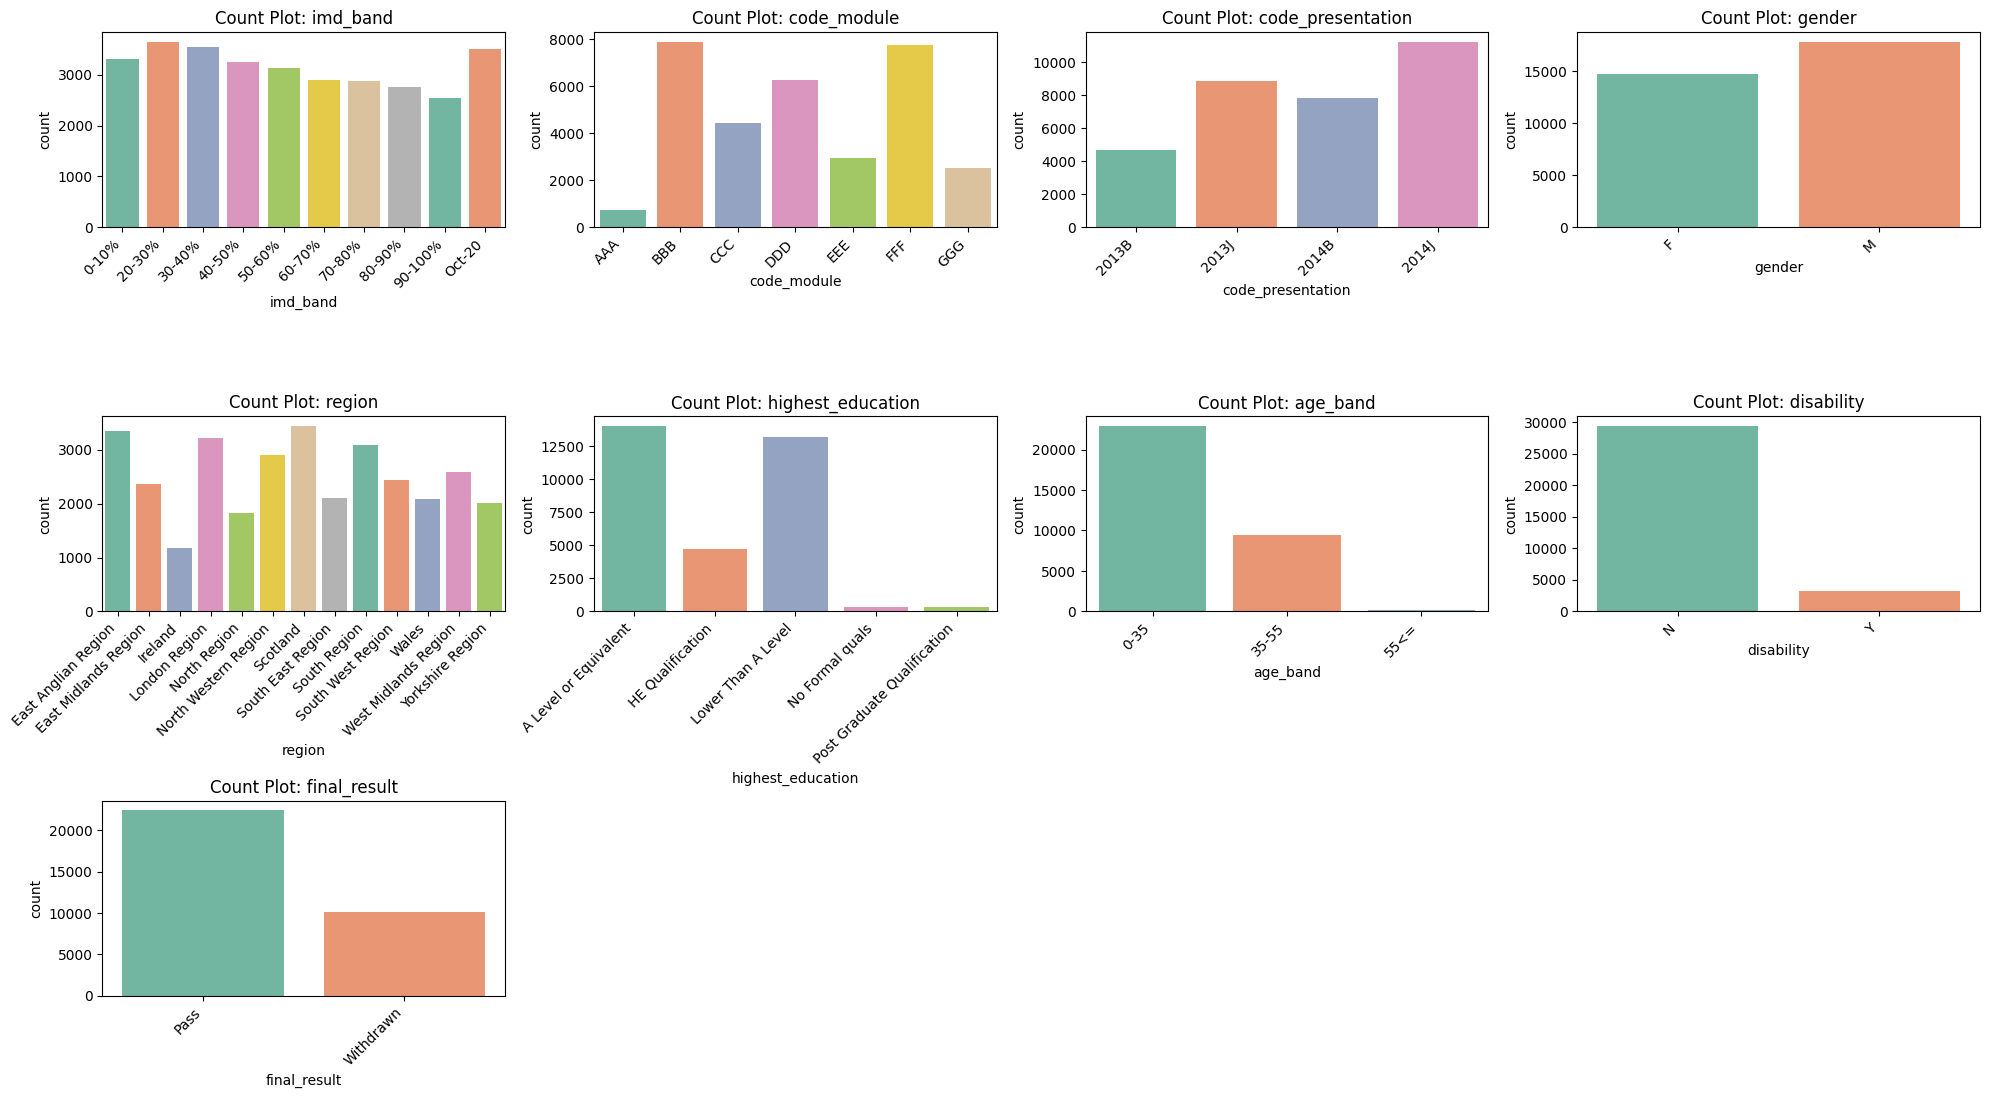

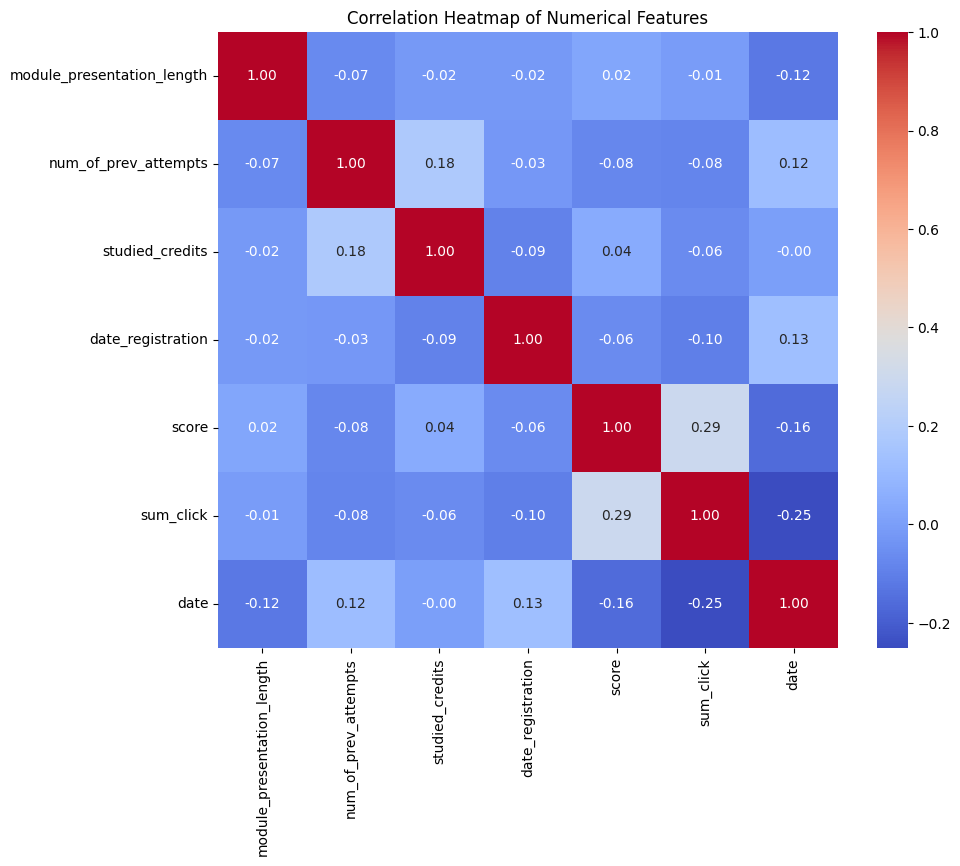

In [ ]:
import math
df = pd.read_csv('/content/final_dataset.csv')

numerical_cols = [
    'module_presentation_length', 'num_of_prev_attempts', 'studied_credits',
    'date_registration', 'score', 'sum_click', 'date'
]

categorical_cols = [
    'imd_band', 'code_module', 'code_presentation', 'gender',
    'region', 'highest_education', 'age_band', 'disability',
    'final_result'
]

df[numerical_cols] = df[numerical_cols].apply(pd.to_numeric, errors='coerce')
df[categorical_cols] = df[categorical_cols].astype('category')

sns.pairplot(df[numerical_cols])
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot: {col}')
    plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)
    sns.violinplot(x=df[col])
    plt.title(f'Violin Plot: {col}')
    plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 14))
for i, col in enumerate(categorical_cols):
    plt.subplot(4, 4, i + 1)
    sns.countplot(data=df, x=col, palette='Set2')
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Count Plot: {col}')
    plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


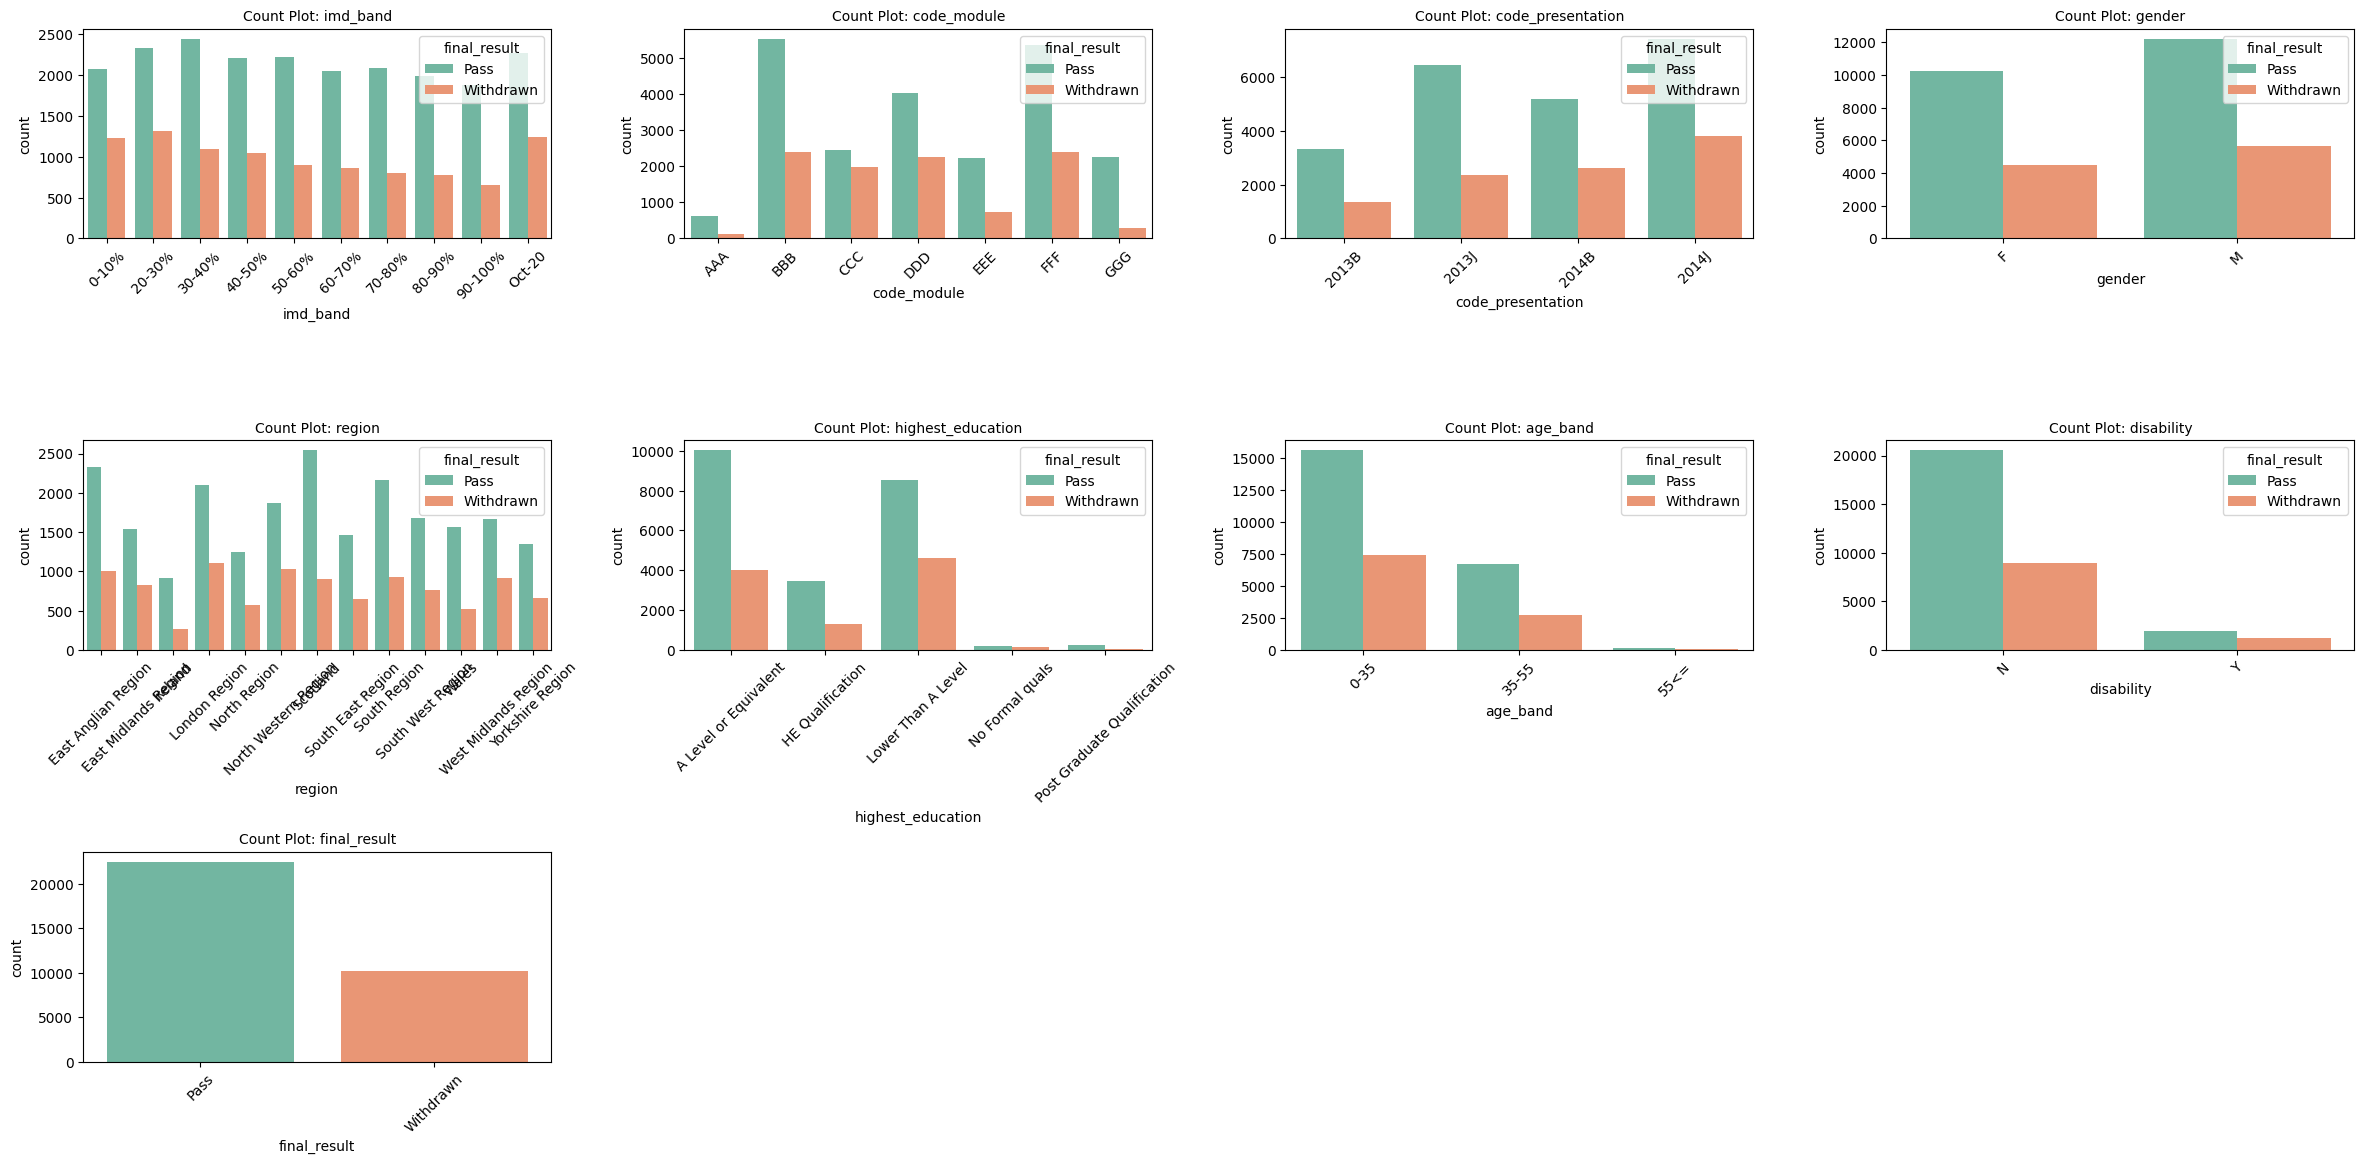

In [ ]:

num_plots = len(categorical_cols)

rows = math.ceil(num_plots / 4)
cols = min(num_plots, 4)

plt.figure(figsize=(6 * cols, 4 * rows))
for i, col in enumerate(categorical_cols):
    plt.subplot(rows, cols, i + 1)
    sns.countplot(data=df, x=col, hue='final_result', palette='Set2')
    plt.title(f'Count Plot: {col}', fontsize=10)
    plt.xticks(rotation=45)

plt.tight_layout(pad=2.0)
plt.show()

<ipython-input-5-12d25818cd75>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby([col, 'final_result'])
<ipython-input-5-12d25818cd75>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby([col, 'final_result'])
<ipython-input-5-12d25818cd75>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby([col, 'final_result'])
<ipython-input-5-12d25818cd75>:20: FutureWarning: The default of observed=False

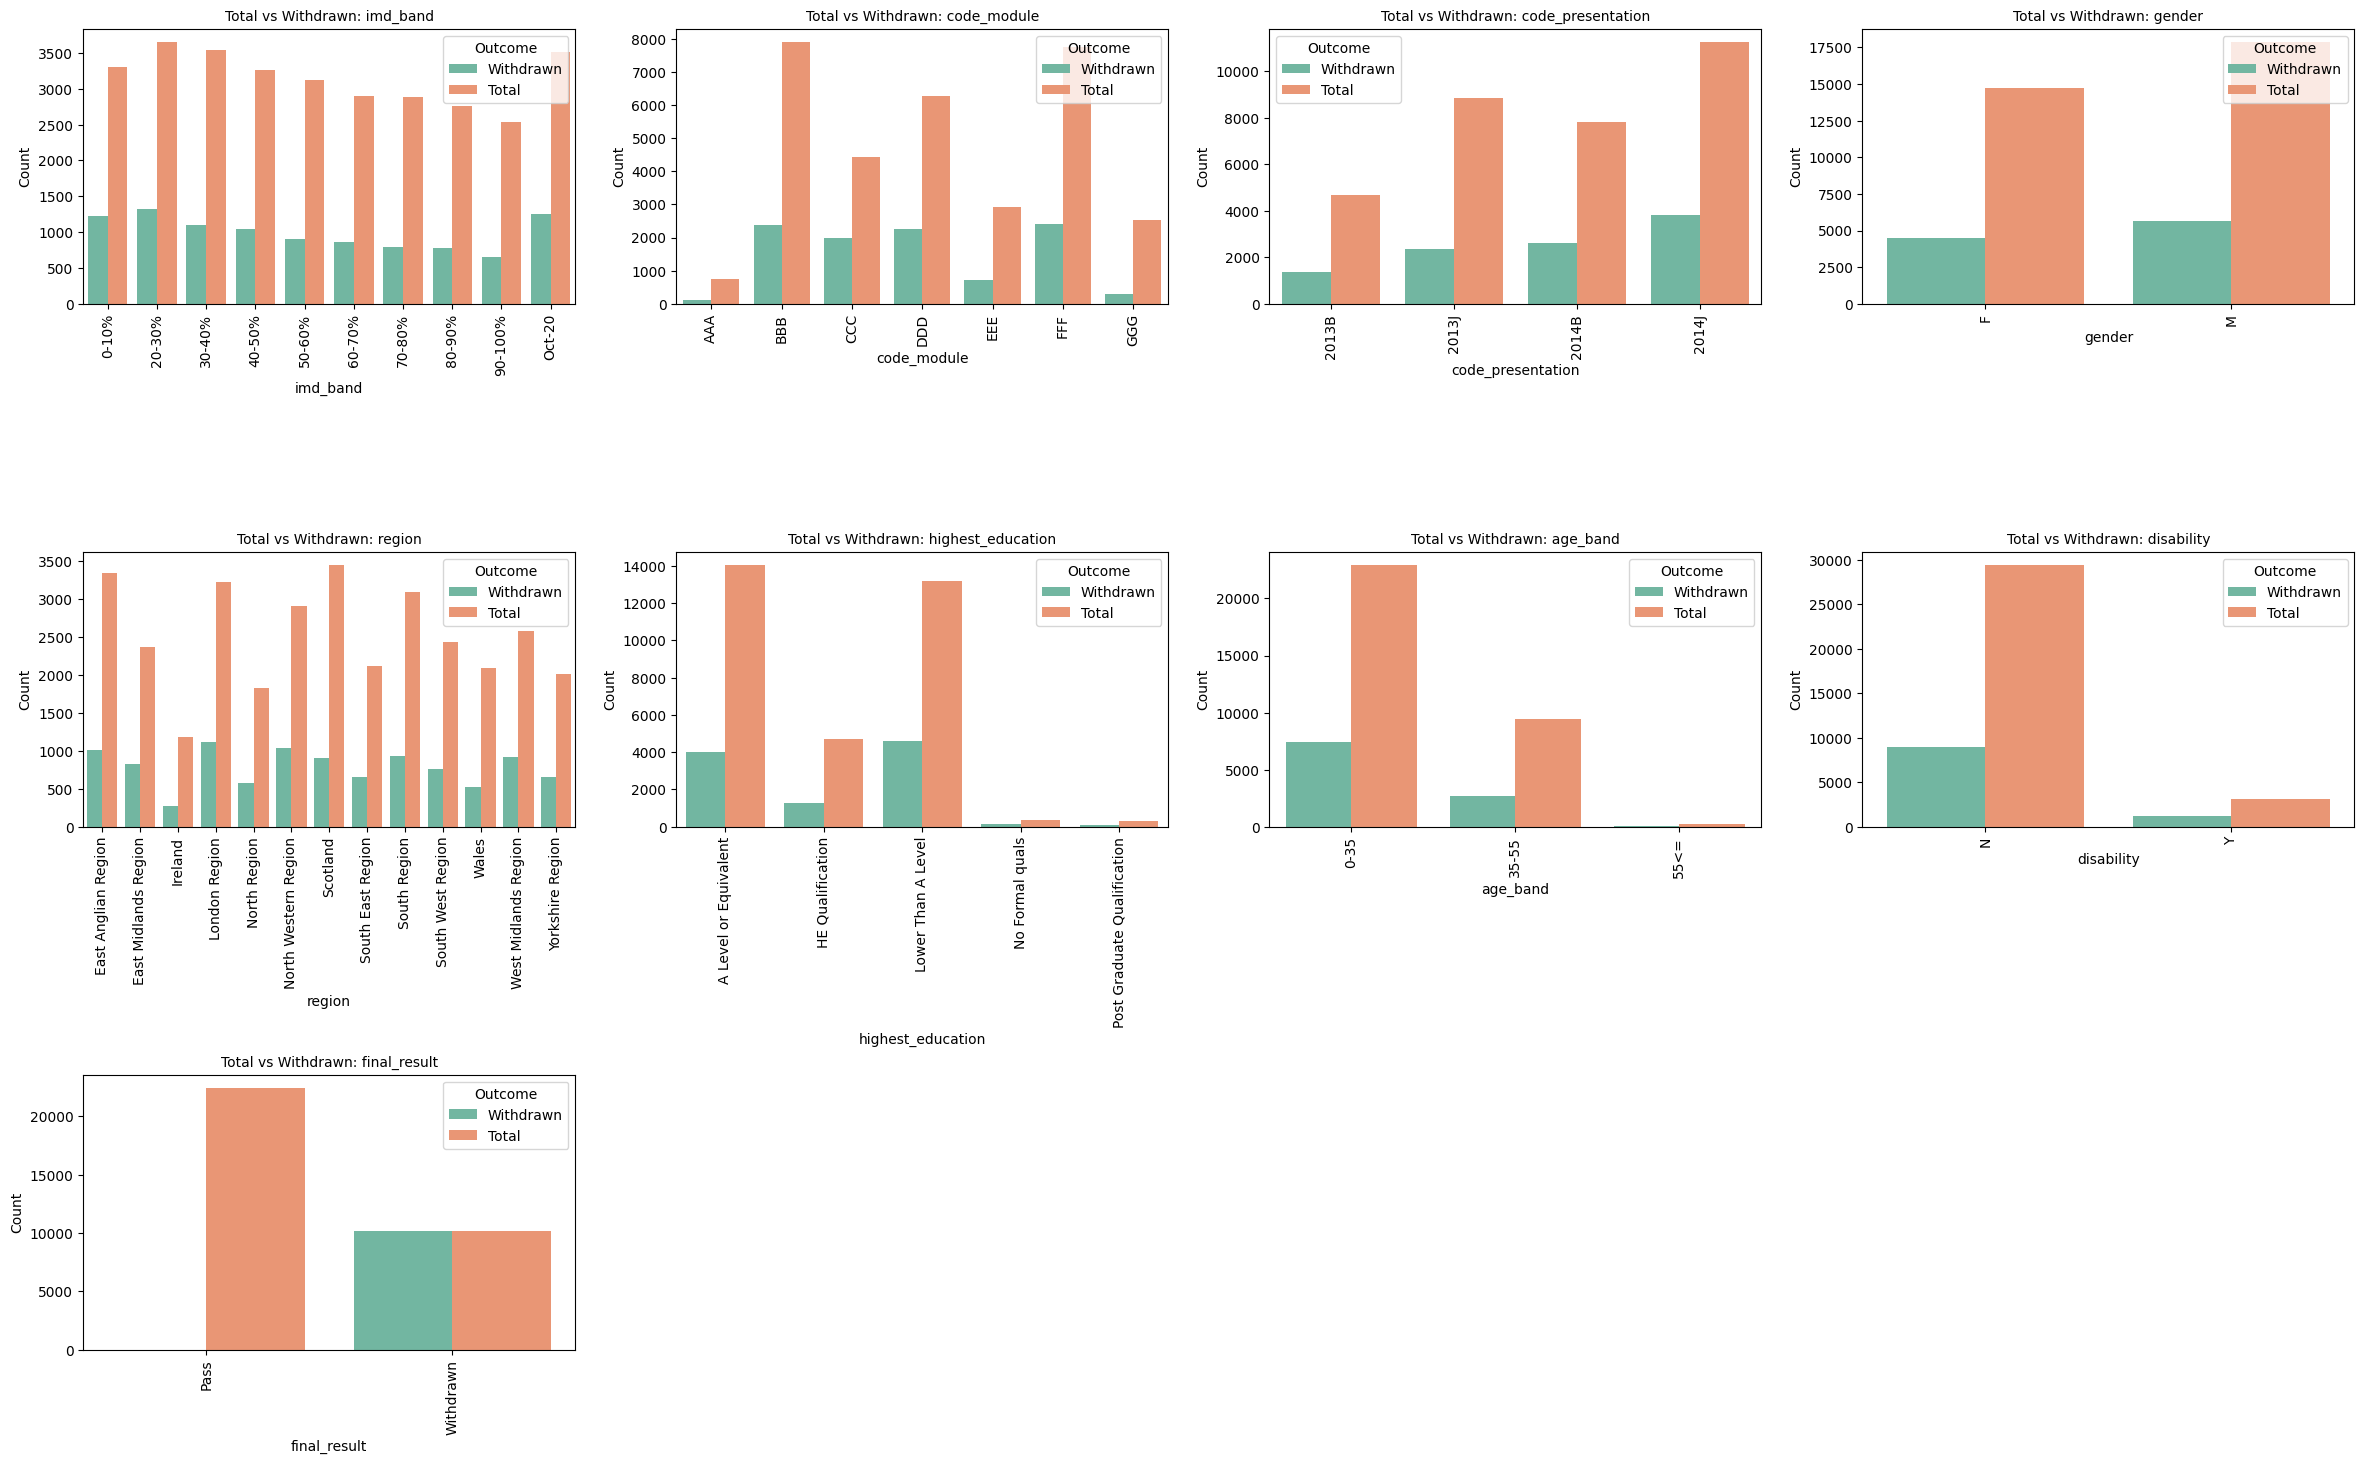

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math

num_plots = len(categorical_cols)

rows = math.ceil(num_plots / 4)
cols = min(num_plots, 4)

plt.figure(figsize=(6 * cols, 5 * rows))

for i, col in enumerate(categorical_cols):

    agg_data = (
        df.groupby([col, 'final_result'])
        .size()
        .unstack(fill_value=0)
    )
    agg_data['Total'] = agg_data.sum(axis=1)


    plot_data = agg_data[['Withdrawn', 'Total']].reset_index()
    plot_data = pd.melt(plot_data, id_vars=[col], var_name='Outcome', value_name='Count')


    plt.subplot(rows, cols, i + 1)
    sns.barplot(data=plot_data, x=col, y='Count', hue='Outcome', palette='Set2')
    plt.title(f'Total vs Withdrawn: {col}', fontsize=10)
    plt.xticks(rotation=90)

plt.tight_layout(pad=2.0)
plt.show()


# **Data Preprocessing**

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

def preprocess_dataset(df):

    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

    for col in numerical_cols:
        df[col].fillna(df[col].mean(), inplace=True)

    for col in categorical_cols:
        df[col].fillna(df[col].mode()[0], inplace=True)

    df[numerical_cols] = df[numerical_cols].apply(pd.to_numeric, errors='coerce')

    encoder = LabelEncoder()
    for col in categorical_cols:
        df[col] = encoder.fit_transform(df[col].astype(str))

    scaler = StandardScaler()
    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

    return df




In [ ]:
df = pd.read_csv('/content/final_dataset.csv')
dfrme = preprocess_dataset(df)

<ipython-input-10-fc504a488fda>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
<ipython-input-10-fc504a488fda>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

# **Initial stage of Model Selection, Training and Evaluation**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.feature_selection import RFE
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

X = dfrme.drop(columns=["final_result"])
y = dfrme["final_result"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def accuracy(y_test, y_pred_test, y_train, y_pred_train):
  accuracy = accuracy_score(y_test, y_pred)
  accuracy_train = accuracy_score(y_train, y_pred_train)

  print(f"Accuracy of the model on test set: {accuracy:.4f}")
  print(f"Accuracy of the model on train set: {accuracy_train:.4f}")
  return accuracy_train, accuracy

# **Logistic Regression**

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
y_pred_train = lr.predict(X_train)

accuracy(y_test, y_pred, y_train, y_pred_train)

Accuracy of the model on test set: 0.7500
Accuracy of the model on train set: 0.7522


(0.7522436143284498, 0.7499616505599018)

# **RF**


In [ ]:
rf_model = RandomForestClassifier(n_estimators=200, random_state=42, max_depth=15, min_samples_split=10)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
y_pred_train = rf_model.predict(X_train)

accuracy(y_test, y_pred, y_train, y_pred_train)

Accuracy of the model on test set: 0.8583
Accuracy of the model on train set: 0.9392


(0.9391731226509166, 0.8582604693971468)

# **RF + L1 (LogReg)**


In [ ]:
lasso_logreg = LogisticRegression(penalty='l1', solver='liblinear', C=0.001)
lasso_logreg.fit(X_train, y_train)

selected_features = np.where(lasso_logreg.coef_.sum(axis=0) != 0)[0]

X_train_np = X_train.values if isinstance(X_train, pd.DataFrame) else X_train
X_test_np = X_test.values if isinstance(X_test, pd.DataFrame) else X_test

X_train_selected = X_train_np[:, selected_features]
X_test_selected = X_test_np[:, selected_features]

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=12, min_samples_split=5)
rf_model.fit(X_train_selected, y_train)

y_pred = rf_model.predict(X_test_selected)
y_pred_train = rf_model.predict(X_train_selected)

accuracy(y_test, y_pred, y_train, y_pred_train)

Accuracy of the model on test set: 0.8598
Accuracy of the model on train set: 0.9055


(0.9055380839150111, 0.8597944470010738)

In [ ]:
feature_names = X_train.columns
selected_feature_names = feature_names[selected_features]
print(f"Selected features by Logistic Regression with L1 regularization: {selected_feature_names}")

Selected features by Logistic Regression with L1 regularization: Index(['code_module', 'region', 'imd_band', 'studied_credits', 'date_quiz',
       'sum_click_homepage', 'sum_click_oucontent', 'date_registration',
       'score'],
      dtype='object')


# Finding optimal C (strength) for L1 regularization

Accuracy of the model on test set: 0.6977
Accuracy of the model on train set: 0.6863
Accuracy of the model on test set: 0.8537
Accuracy of the model on train set: 0.8948
Accuracy of the model on test set: 0.8572
Accuracy of the model on train set: 0.9137
Accuracy of the model on test set: 0.8538
Accuracy of the model on train set: 0.9131
Accuracy of the model on test set: 0.8572
Accuracy of the model on train set: 0.9131
Accuracy of the model on test set: 0.8557
Accuracy of the model on train set: 0.9151
Accuracy of the model on test set: 0.8572
Accuracy of the model on train set: 0.9144
Accuracy of the model on test set: 0.8572
Accuracy of the model on train set: 0.9144


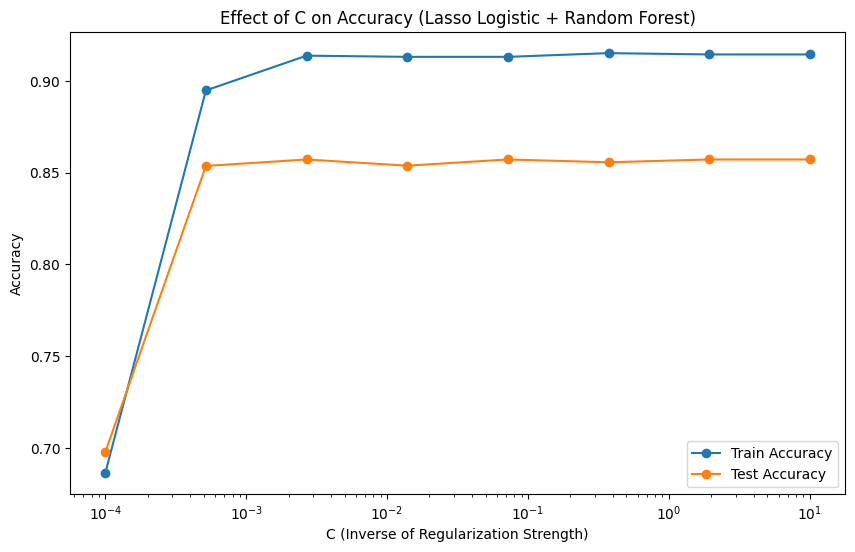

In [ ]:
import matplotlib.pyplot as plt

C_values = np.logspace(-4, 1, 8)
train_accuracies = []
test_accuracies = []

for C in C_values:
    lasso_logreg = LogisticRegression(penalty='l1', solver='liblinear', C=C)
    lasso_logreg.fit(X_train, y_train)

    selected_features = np.where(lasso_logreg.coef_.sum(axis=0) != 0)[0]

    X_train_np = X_train.values if isinstance(X_train, pd.DataFrame) else X_train
    X_test_np = X_test.values if isinstance(X_test, pd.DataFrame) else X_test
    X_train_selected = X_train_np[:, selected_features]
    X_test_selected = X_test_np[:, selected_features]

    rf_model = RandomForestClassifier(n_estimators=100, random_state=42,
                                      max_depth=12, min_samples_split=5)
    rf_model.fit(X_train_selected, y_train)

    y_pred_train = rf_model.predict(X_train_selected)
    y_pred = rf_model.predict(X_test_selected)

    train_acc, test_acc = accuracy(y_test, y_pred, y_train, y_pred_train)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

plt.figure(figsize=(10, 6))
plt.plot(C_values, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(C_values, test_accuracies, label='Test Accuracy', marker='o')
plt.xscale('log')
plt.xlabel('C (Inverse of Regularization Strength)')
plt.ylabel('Accuracy')
plt.title('Effect of C on Accuracy (Lasso Logistic + Random Forest)')
plt.legend()
plt.show()


# MLP + L1

In [ ]:
mlp_model = MLPClassifier(hidden_layer_sizes=(170,),
                          max_iter=600, random_state=42)
mlp_model.fit(X_train_selected, y_train)

y_pred = mlp_model.predict(X_test_selected)
y_pred_train = mlp_model.predict(X_train_selected)

accuracy(y_test, y_pred, y_train, y_pred_train)

Accuracy of the model on test set: 0.8481
Accuracy of the model on train set: 0.8725


(0.8724783309043491, 0.8481362172112287)

# ROC CURVES


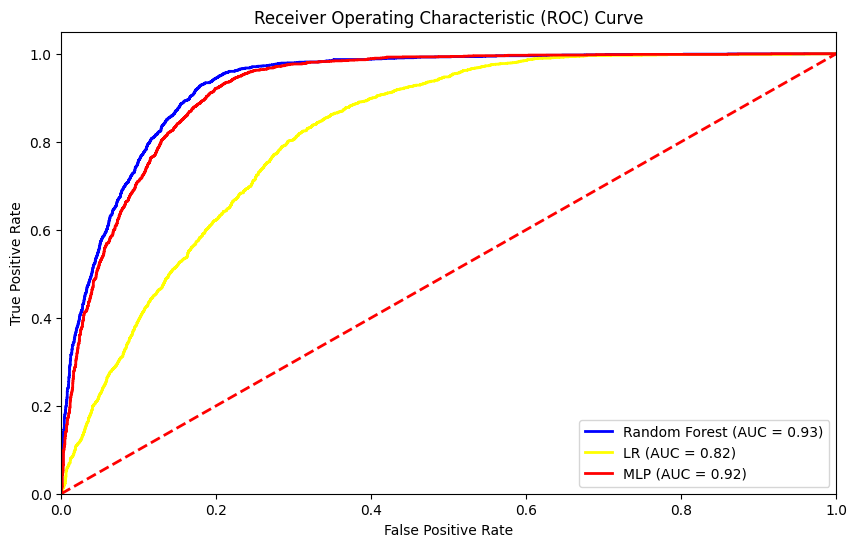

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
y_binary = (y == 0).astype(int)
y_prob_rf = rf_model.predict_proba(X_test_selected)[:, 1]
y_prob_lr = lr.predict_proba(X_test)[:, 1]
y_prob_mlp = mlp_model.predict_proba(X_test_selected)[:, 1]


fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_prob_mlp)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_lr, tpr_lr, color='yellow', lw=2, label=f'LR (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_mlp, tpr_mlp, color='red', lw=2, label=f'MLP (AUC = {roc_auc_mlp:.2f})')

plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Visualization of evaluation metrics for RF, MLP, and LR

[0.7311217808817111, 0.7323877068557919, 0.6073888541014402] [0.8489609731373543, 0.7850988342625443, 0.49163710086163204]


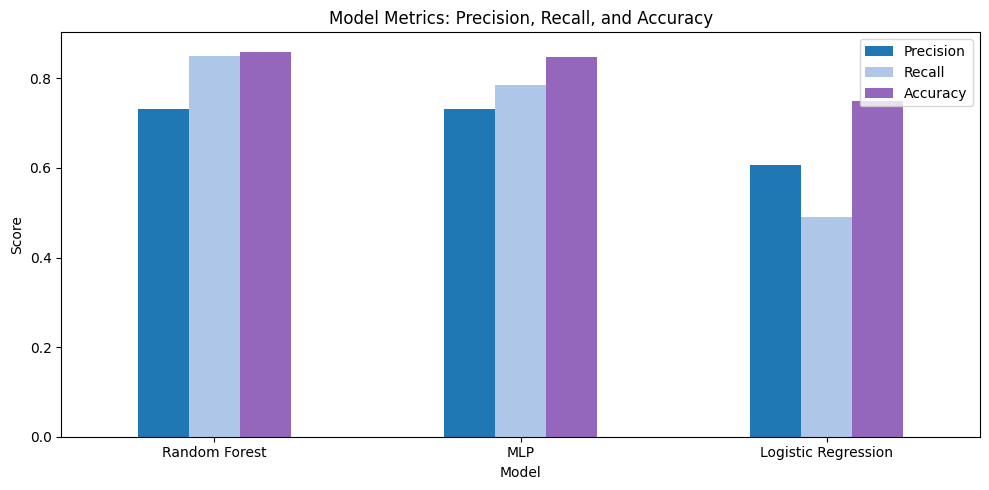

| Model               |   Precision |   Recall |   Accuracy |
|---------------------|-------------|----------|------------|
| Random Forest       |    0.731122 | 0.848961 |   0.859794 |
| MLP                 |    0.732388 | 0.785099 |   0.848136 |
| Logistic Regression |    0.607389 | 0.491637 |   0.749962 |


In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
from tabulate import tabulate
y_pred_rf = rf_model.predict(X_test_selected)
y_pred_mlp = mlp_model.predict(X_test_selected)
y_pred_lr = lr.predict(X_test)

metrics = {
    'Model': ['Random Forest', 'MLP', 'Logistic Regression'],
    'Precision': [
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_mlp),
        precision_score(y_test, y_pred_lr)
    ],
    'Recall': [
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_mlp),
        recall_score(y_test, y_pred_lr)
    ],
    'Accuracy': [
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_mlp),
        accuracy_score(y_test, y_pred_lr)
    ]
}
print(metrics['Precision'], metrics['Recall'], )
metrics_df = pd.DataFrame(metrics)
color_map = ['#1f77b4', '#aec7e8', '#9467bd']
metrics_df.set_index('Model').plot(kind='bar', figsize=(10, 5), color=color_map)
plt.title('Model Metrics: Precision, Recall, and Accuracy')
plt.ylabel('Score')
plt.xticks(rotation=0)

plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

table = tabulate(metrics_df, headers='keys', tablefmt='github', showindex=False)
print(table)

  
# **Further Model Selection, Training and Evaluation +  Testing**

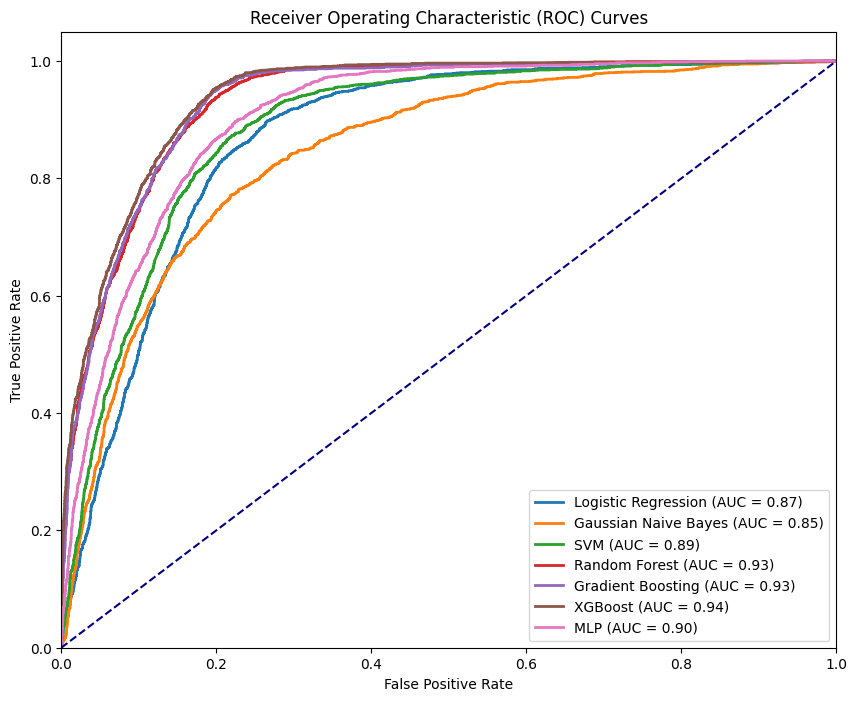

Model Evaluation Results:

Logistic Regression:
Accuracy: 0.7960
Classification Report:
              precision    recall  f1-score   support

        Pass       0.84      0.87      0.86      4546
   Withdrawn       0.67      0.63      0.65      1973

    accuracy                           0.80      6519
   macro avg       0.76      0.75      0.75      6519
weighted avg       0.79      0.80      0.79      6519

ROC AUC: 0.87

Gaussian Naive Bayes:
Accuracy: 0.6986
Classification Report:
              precision    recall  f1-score   support

        Pass       0.93      0.62      0.74      4546
   Withdrawn       0.50      0.89      0.64      1973

    accuracy                           0.70      6519
   macro avg       0.71      0.75      0.69      6519
weighted avg       0.80      0.70      0.71      6519

ROC AUC: 0.85

SVM:
Accuracy: 0.8099
Classification Report:
              precision    recall  f1-score   support

        Pass       0.85      0.88      0.87      4546
   Withdrawn

In [9]:
import pickle
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/final_dataset.csv')

# Preprocessing function
def preprocess_data(df, null_threshold=0.5):
    missing_ratios = df.isnull().mean()
    columns_to_drop = missing_ratios[missing_ratios > null_threshold].index.tolist()
    df = df.drop(columns=columns_to_drop)

    # Identify categorical and numerical columns
    categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

    # Exclude the target column from features
    categorical_columns.remove('final_result')
    feature_columns = categorical_columns + numerical_columns

    # Prepare features and target
    X = df[feature_columns]
    y = df['final_result']

    # Create preprocessing steps
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', Pipeline([
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())
            ]), numerical_columns),
            ('cat', Pipeline([
                ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
                ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
            ]), categorical_columns)
        ])

    # Encode target variable
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    return X, y_encoded, preprocessor, le

# Prepare data
X, y, preprocessor, label_encoder = preprocess_data(df)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model definitions
models = {
    'Logistic Regression': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(max_iter=1000))
    ]),
    'Gaussian Naive Bayes': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', GaussianNB())
    ]),
    'SVM': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', SVC(C=0.01, kernel='poly', gamma=0.1, probability=True))
    ]),
    'Random Forest': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(n_estimators=100, max_depth=12, min_samples_split=5))
    ]),
    'Gradient Boosting': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', GradientBoostingClassifier(n_estimators=100, max_depth=12, min_samples_split=5))
    ]),
    'XGBoost': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', XGBClassifier(n_estimators=400, learning_rate=0.01, max_depth=12, min_child_weight=3, subsample=0.7, colsample_bytree=0.7))
    ]),
    'MLP': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', MLPClassifier(hidden_layer_sizes=(170,), max_iter=600, random_state=42))
    ])
}

# Model training, evaluation, and saving
results = {}
plt.figure(figsize=(10, 8))

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Save the trained model to a pickle file
    with open(f'{name.replace(" ", "_")}.pkl', 'wb') as file:
        pickle.dump(model, file)

    # Predict probabilities (not just the classes)
    y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probability for the positive class

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)  # Calculate AUC

    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

    # Store results
    accuracy = accuracy_score(y_test, model.predict(X_test))
    report = classification_report(y_test, model.predict(X_test), target_names=label_encoder.classes_)

    results[name] = {
        'accuracy': accuracy,
        'classification_report': report,
        'roc_auc': roc_auc
    }

# Plot settings for ROC curves
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()

# Print results
print("Model Evaluation Results:")
for name, result in results.items():
    print(f"\n{name}:")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print("Classification Report:")
    print(result['classification_report'])
    print(f"ROC AUC: {result['roc_auc']:.2f}")


## Trying out smote (Class imbalance)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# Load the data
df = pd.read_csv('/content/final_dataset.csv')

# Preprocessing
def preprocess_data(df, null_threshold=0.5):
    # Drop columns with a high percentage of missing values
    missing_ratios = df.isnull().mean()
    columns_to_drop = missing_ratios[missing_ratios > null_threshold].index.tolist()
    df = df.drop(columns=columns_to_drop)

    # Identify categorical and numerical columns
    categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

    # Exclude the target column from features
    categorical_columns.remove('final_result')
    feature_columns = categorical_columns + numerical_columns

    # Prepare features and target
    X = df[feature_columns]
    y = df['final_result']

    # Create preprocessing steps
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', Pipeline([
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())
            ]), numerical_columns),
            ('cat', Pipeline([
                ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
                ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
            ]), categorical_columns)
        ])

    X_preprocessed = preprocessor.fit_transform(X)

    # Encode target variable
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    return X_preprocessed, y_encoded, preprocessor, le

# # Prepare data
X, y, preprocessor, label_encoder = preprocess_data(df)

# # Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Model definitions
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Gaussian Naive Bayes': GaussianNB(),
    'SVM': SVC(C=0.01, kernel='rbf'),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=12, min_samples_split=5),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, max_depth=12, min_samples_split=5),
    'XGBoost': XGBClassifier(n_estimators=400, learning_rate=0.01, max_depth=12, min_child_weight=3, subsample=0.7, colsample_bytree=0.7)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train_balanced, y_train_balanced)

    # Predict
    y_pred = model.predict(X_test)

    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

    results[name] = {
        'accuracy': accuracy,
        'classification_report': report
    }

# Print results
print("Model Evaluation Results:")
for name, result in results.items():
    print(f"\n{name}:")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print("Classification Report:")
    print(result['classification_report'])

Model Evaluation Results:

Logistic Regression:
Accuracy: 0.7966
Classification Report:
              precision    recall  f1-score   support

        Pass       0.93      0.76      0.84      4546
   Withdrawn       0.62      0.87      0.72      1973

    accuracy                           0.80      6519
   macro avg       0.77      0.82      0.78      6519
weighted avg       0.84      0.80      0.80      6519


Gaussian Naive Bayes:
Accuracy: 0.6998
Classification Report:
              precision    recall  f1-score   support

        Pass       0.92      0.62      0.74      4546
   Withdrawn       0.50      0.88      0.64      1973

    accuracy                           0.70      6519
   macro avg       0.71      0.75      0.69      6519
weighted avg       0.80      0.70      0.71      6519


SVM:
Accuracy: 0.7730
Classification Report:
              precision    recall  f1-score   support

        Pass       0.95      0.71      0.81      4546
   Withdrawn       0.58      0.91      0

# Visualization of Evaluation Metrics across different models

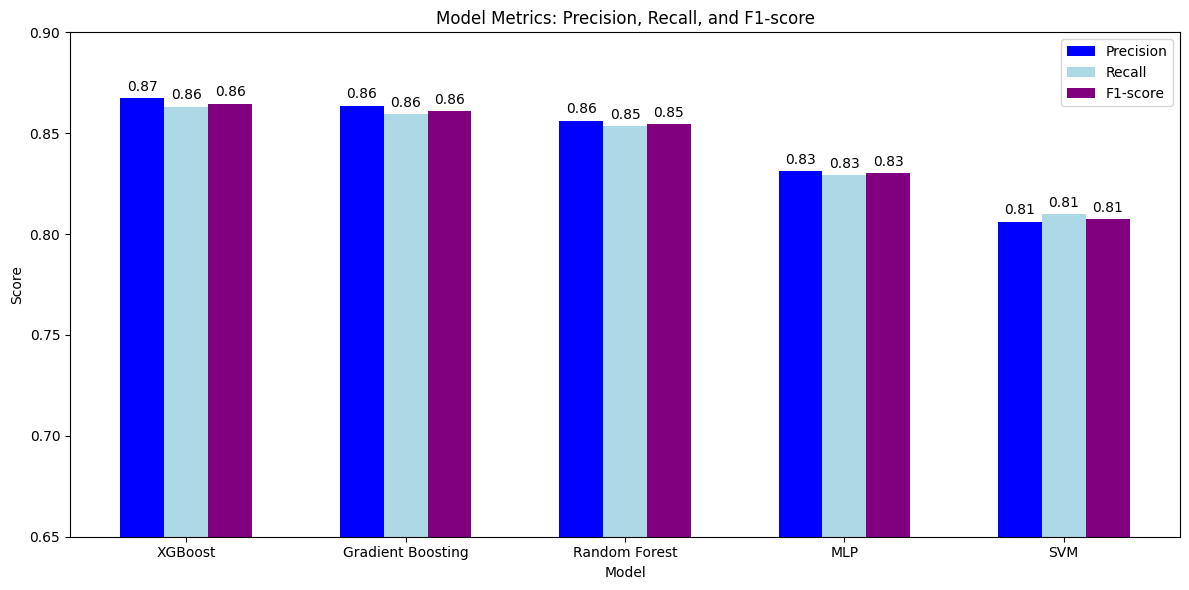

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

def plot_metrics_grouped_bar(models, X_test, y_test):

    metrics = {}
    for name, model in models.items():
        y_pred = model.predict(X_test)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        metrics[name] = {'precision': precision, 'recall': recall, 'f1': f1}

    # Convert metrics to DataFrame for sorting
    metrics_df = pd.DataFrame(metrics).T.sort_values('f1', ascending=False)

    # Select the top 5 models
    top_5_models = metrics_df.head(5)

    # Create grouped bar plot
    labels = top_5_models.index  # Model names
    precision = top_5_models['precision']
    recall = top_5_models['recall']
    f1 = top_5_models['f1']

    # Number of models and metric groups
    x = np.arange(len(labels))  # the label locations
    width = 0.2  # the width of the bars

    # Plotting the metrics
    fig, ax = plt.subplots(figsize=(12, 6))
    bars1 = ax.bar(x - width, precision, width, label='Precision', color='blue')
    bars2 = ax.bar(x, recall, width, label='Recall', color='lightblue')
    bars3 = ax.bar(x + width, f1, width, label='F1-score', color='purple')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xlabel('Model')
    ax.set_ylabel('Score')
    ax.set_title('Model Metrics: Precision, Recall, and F1-score')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    # Set y-axis limit to 1.2
    ax.set_ylim(0.65, 0.9)

    # Annotate bars with their values
    for bars in [bars1, bars2, bars3]:
        ax.bar_label(bars, fmt='%.2f', padding=3)

    fig.tight_layout()
    plt.show()

# Example usage (assuming you have your models and test data)
# models is a dictionary where keys are model names and values are trained model objects
plot_metrics_grouped_bar(models, X_test, y_test)


## Grid Search for Hyperparameter Tuning (SVM, XGBoost, Gradient Boosting)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for SVM
param_grid_svm = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__kernel': ['linear', 'rbf', 'poly'],
    'classifier__gamma': [0.001, 0.01, 0.1, 1],
    'classifier__degree': [2, 3, 4]  # Only applicable if kernel='poly'
}

# Initialize GridSearchCV for SVM
grid_search_svm = GridSearchCV(models['SVM'], param_grid=param_grid_svm, cv=5, scoring='accuracy', verbose=2)
grid_search_svm.fit(X_train, y_train)

print("Best parameters for SVM:", grid_search_svm.best_params_)
print("Best cross-validation accuracy:", grid_search_svm.best_score_)


Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] END classifier__C=0.1, classifier__degree=2, classifier__gamma=0.001, classifier__kernel=linear; total time=  29.3s
[CV] END classifier__C=0.1, classifier__degree=2, classifier__gamma=0.001, classifier__kernel=linear; total time=  17.6s
[CV] END classifier__C=0.1, classifier__degree=2, classifier__gamma=0.001, classifier__kernel=linear; total time=  17.3s
[CV] END classifier__C=0.1, classifier__degree=2, classifier__gamma=0.001, classifier__kernel=linear; total time=  17.5s
[CV] END classifier__C=0.1, classifier__degree=2, classifier__gamma=0.001, classifier__kernel=linear; total time=  18.5s
[CV] END classifier__C=0.1, classifier__degree=2, classifier__gamma=0.001, classifier__kernel=rbf; total time=  26.6s
[CV] END classifier__C=0.1, classifier__degree=2, classifier__gamma=0.001, classifier__kernel=rbf; total time=  26.6s
[CV] END classifier__C=0.1, classifier__degree=2, classifier__gamma=0.001, classifier__kernel=rb

In [ ]:
# Define parameter grid for XGBoost
param_grid_xgb = {
    'classifier__n_estimators': [200, 500, 1000],
    'classifier__learning_rate': [0.01, 0.05, 0.1],
    'classifier__max_depth': [3, 5, 7],
    'classifier__min_child_weight': [1, 3, 5],
    'classifier__subsample': [0.7, 0.8, 1],
    'classifier__colsample_bytree': [0.7, 0.8, 1]
}

# Initialize GridSearchCV for XGBoost
grid_search_xgb = GridSearchCV(models['XGBoost'], param_grid=param_grid_xgb, cv=5, scoring='accuracy', verbose=2)
grid_search_xgb.fit(X_train, y_train)

print("Best parameters for XGBoost:", grid_search_xgb.best_params_)
print("Best cross-validation accuracy:", grid_search_xgb.best_score_)


SyntaxError: invalid syntax (<ipython-input-1-ff1301c41741>, line 1)

In [ ]:
# Define parameter grid for Gradient Boosting
param_grid_gb = {
    'classifier__n_estimators': [100, 300, 500],
    'classifier__learning_rate': [0.01, 0.05, 0.1],
    'classifier__max_depth': [3, 5, 7],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 5, 10],
    'classifier__subsample': [0.7, 0.8, 1],
    'classifier__max_features': ['auto', 'sqrt', 'log2']
}

# Initialize GridSearchCV for Gradient Boosting
grid_search_gb = GridSearchCV(models['Gradient Boosting'], param_grid=param_grid_gb, cv=5, scoring='accuracy', verbose=2)
grid_search_gb.fit(X_train, y_train)

print("Best parameters for Gradient Boosting:", grid_search_gb.best_params_)
print("Best cross-validation accuracy:", grid_search_gb.best_score_)
